In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


### In this dataset, we have details of 215 students such as educational qualification,gender,specialisation,placement status and salary 
    sl_no - Serial Number
    gender- Male='M',Female='F'
    ssc_p - Secondary Education percentage- 10th Grade 
    ssc_b - Board of Education- Central/ Others 
    hsc_p - Higher Secondary Education percentage- 12th Grade 
    hsc_b - Board of Education- Central/ Others 
    hsc_s - Specialization in Higher Secondary Education 
    degree_p - Degree Percentage 
    degree_t - Under Graduation(Degree type)- Field of degree education 
    workex - Work Experience etest_p -
    Employability test percentage ( conducted by college) 
    specialization - Post Graduation(MBA)- Specialization 
    mba_p - MBA percentage 
    status - Status of placement- Placed/Not placed 
    salary - Salary offered by corporate to candidates

In [4]:
df.shape

(215, 15)

# Handling Missing Values

In [5]:
# Checking Missing Values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
df["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [7]:
i = df.groupby("status").salary
for c in i:
    print(c)

('Not Placed', 3     NaN
5     NaN
6     NaN
9     NaN
12    NaN
       ..
198   NaN
201   NaN
206   NaN
208   NaN
214   NaN
Name: salary, Length: 67, dtype: float64)
('Placed', 0      270000.0
1      200000.0
2      250000.0
4      425000.0
7      252000.0
         ...   
209    216000.0
210    400000.0
211    275000.0
212    295000.0
213    204000.0
Name: salary, Length: 148, dtype: float64)


### As all NAN values in salary column are of students who are not placed so they will have zero salary. 

In [8]:
df["salary"].fillna(0,inplace=True)

In [9]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [10]:
df.drop(["sl_no","ssc_b","hsc_b"],axis=1,inplace=True)

# Handling Outliers

<AxesSubplot:xlabel='etest_p'>

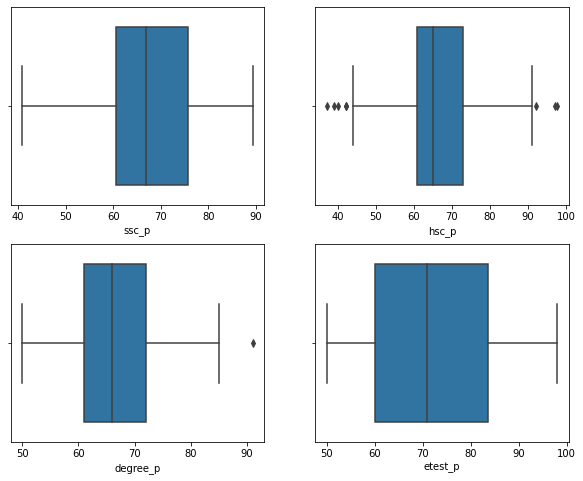

In [11]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
sns.boxplot(data=df,x="ssc_p",ax=ax[0,0])
sns.boxplot(data=df,x="hsc_p",ax=ax[0,1])
sns.boxplot(data=df,x="degree_p",ax=ax[1,0])
sns.boxplot(data=df,x="etest_p",ax=ax[1,1])

In [12]:
df[df["degree_p"]>85]

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
197,F,83.96,53.0,Science,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed,260000.0


In [13]:
df.drop(197,inplace=True)

In [14]:
df[df["hsc_p"]>91]

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
24,M,76.50,97.7,Science,78.86,Sci&Tech,No,97.4,Mkt&Fin,74.01,Placed,360000.0
134,F,77.44,92.0,Commerce,72.00,Comm&Mgmt,Yes,94.0,Mkt&Fin,67.13,Placed,250000.0
177,F,73.00,97.0,Commerce,79.00,Comm&Mgmt,Yes,89.0,Mkt&Fin,70.81,Placed,650000.0


In [15]:
df[df["hsc_p"]<43]

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
42,M,49.00,39.00,Science,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed,0.0
49,F,50.00,37.00,Arts,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed,0.0
120,M,58.00,40.00,Science,59.00,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed,0.0
169,M,59.96,42.16,Science,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,Not Placed,0.0
206,M,41.00,42.00,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0


In [16]:
df.drop([24,134,177,42,49,120,169,206],axis=0,inplace=True)

<AxesSubplot:xlabel='hsc_p'>

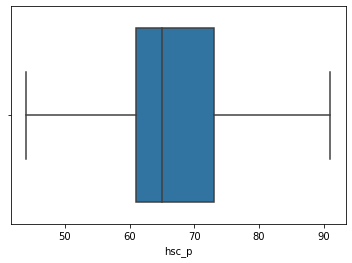

In [17]:
sns.boxplot(data=df,x="hsc_p")

# Data Visualization

<AxesSubplot:xlabel='status', ylabel='count'>

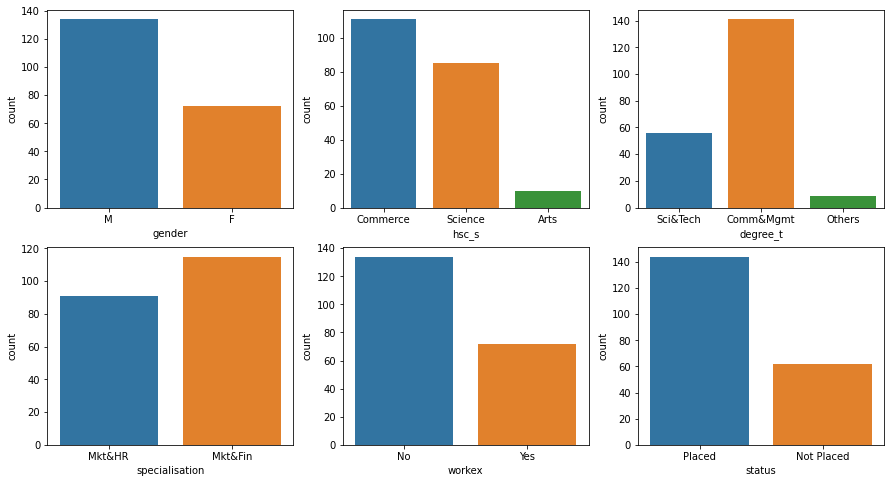

In [18]:
fig,ax = plt.subplots(2,3,figsize=(15,8))
sns.countplot(data=df,x="gender",ax=ax[0,0])
sns.countplot(data=df,x="hsc_s",ax=ax[0,1])
sns.countplot(data=df,x="degree_t",ax=ax[0,2])
sns.countplot(data=df,x="specialisation",ax=ax[1,0])
sns.countplot(data=df,x="workex",ax=ax[1,1])
sns.countplot(data=df,x="status",ax=ax[1,2])

### Interpretation:
    In this dataset Male canditates are more than female.
    Commerce Students are more as compared to Science avd arts.
    Number of Marketing & Finance specialisation Students is high
    Most of our candidates from our dataset don't have any work experience
    Most of our candidates from our dataset got placed in a company

<AxesSubplot:xlabel='salary', ylabel='Density'>

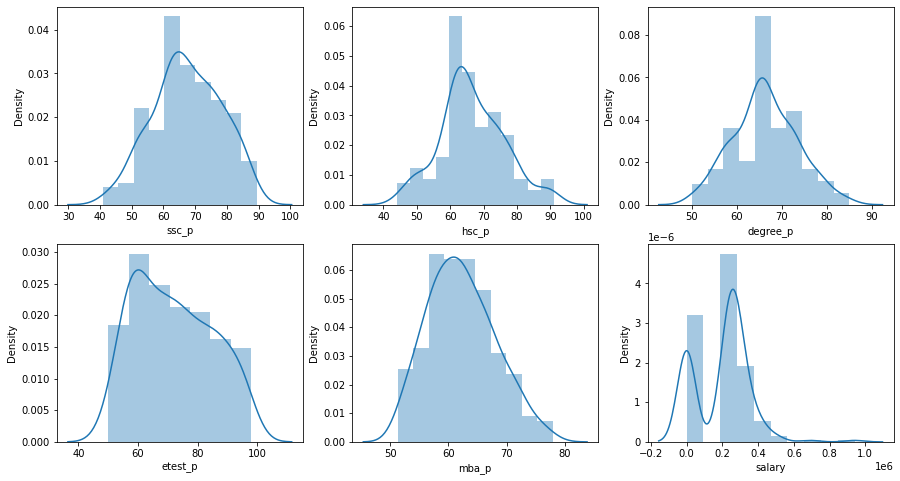

In [19]:
fig,ax = plt.subplots(2,3,figsize=(15,8))
sns.distplot(df["ssc_p"],ax=ax[0,0])
sns.distplot(df["hsc_p"],ax=ax[0,1])
sns.distplot(df["degree_p"],ax=ax[0,2])
sns.distplot(df["etest_p"],ax=ax[1,0])
sns.distplot(df["mba_p"],ax=ax[1,1])
sns.distplot(df["salary"],ax=ax[1,2])

### All the distributions follow normal distribution except salary feature
### Most of the candidates educational performances are between 60-80%
### Salary distribution got outliers where few have got salary of 7.5L and 10L PA

<AxesSubplot:xlabel='workex', ylabel='count'>

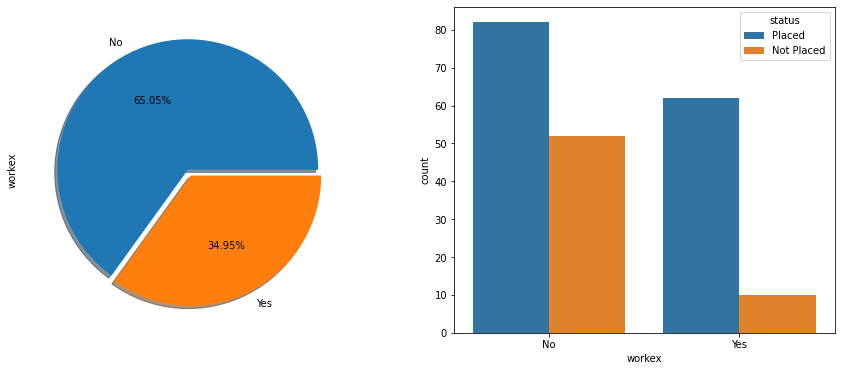

In [20]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
df["workex"].value_counts().plot.pie(explode=(0,0.05),autopct="%1.2f%%",shadow=True,ax=ax[0])
sns.countplot(data=df,x="workex",hue="status",ax=ax[1])

### There are more students with no work experience.
### More Students with no work experience have got hired compared to the students with experience in work

<AxesSubplot:>

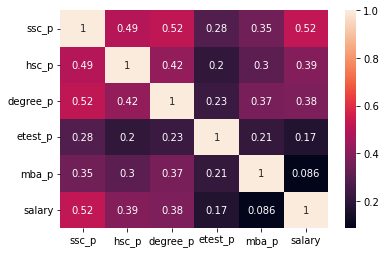

In [21]:
sns.heatmap(df.corr(),annot=True)

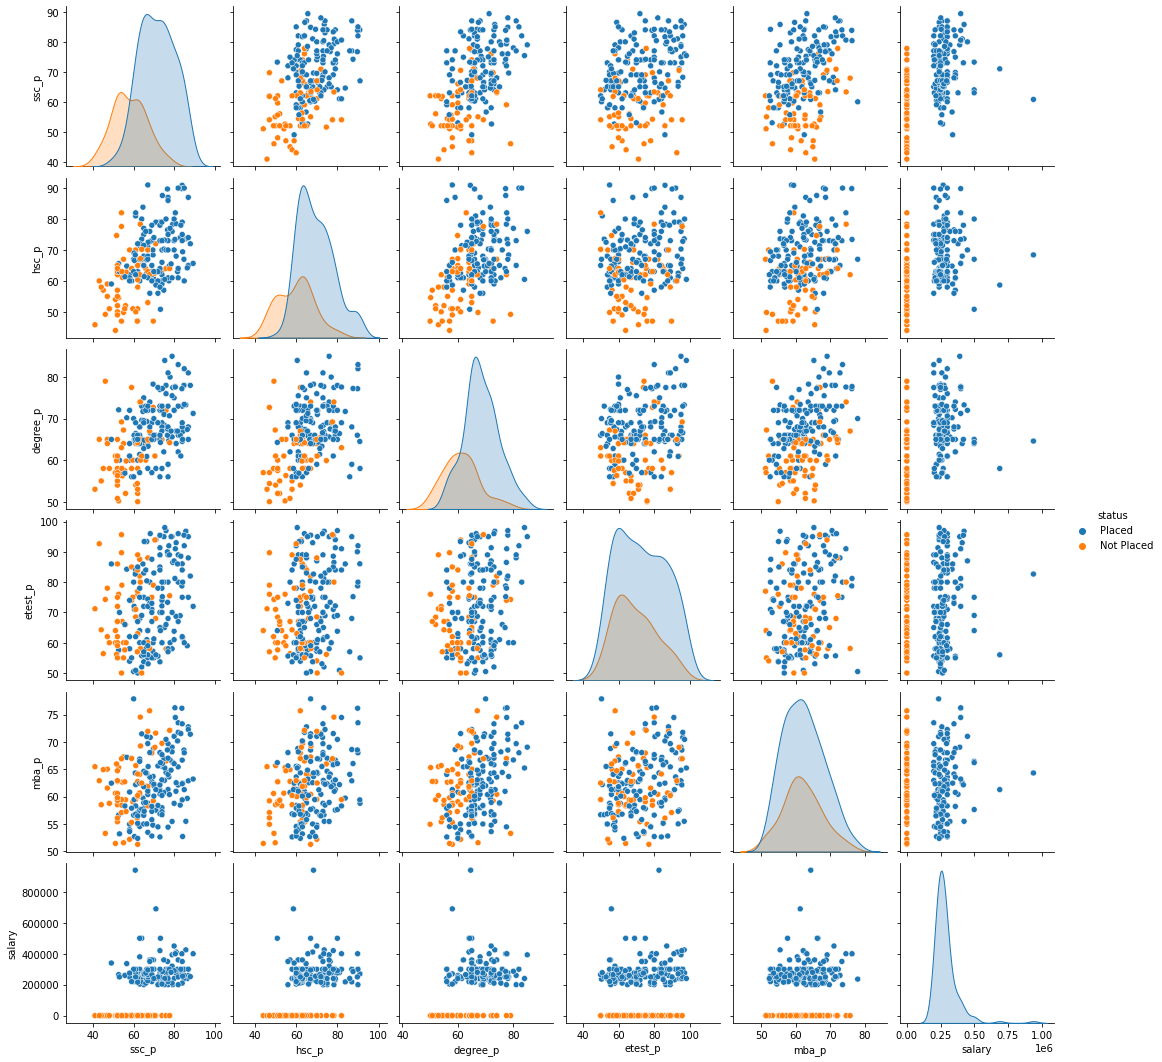

In [22]:
sns.pairplot(data=df,hue="status")

# Handling Categorical Data

In [23]:
cat_col = ["gender","hsc_s","degree_t","workex","specialisation","status"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [24]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1,425000.0


# Separate X and Y

In [25]:
x = df.iloc[:,:-2]
y = df.iloc[:,-2]

In [26]:
x

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,1,77.60,0,0,91.0,0,74.49
211,1,58.00,60.00,2,72.00,2,0,74.0,0,53.62
212,1,67.00,67.00,1,73.00,0,1,59.0,0,69.72
213,0,74.00,66.00,1,58.00,0,0,70.0,1,60.23


In [27]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 206, dtype: int32

# Train and Test Split

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [29]:
xtrain

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
148,0,77.0,86.0,0,56.0,1,0,57.00,0,64.08
126,0,79.0,61.0,2,75.5,2,1,70.00,0,68.20
30,0,64.0,73.5,1,73.0,0,0,52.00,1,56.70
95,1,73.0,78.0,1,65.0,0,1,95.46,0,62.16
210,1,80.6,82.0,1,77.6,0,0,91.00,0,74.49
...,...,...,...,...,...,...,...,...,...,...
19,1,60.0,67.0,0,70.0,0,1,50.48,0,77.89
81,1,81.7,63.0,2,67.0,0,1,86.00,0,70.20
79,0,69.0,62.0,2,66.0,2,0,75.00,1,67.99
117,1,77.0,75.0,2,73.0,2,0,80.00,0,67.05


In [30]:
ytrain

148    1
126    1
30     1
95     1
210    1
      ..
19     1
81     1
79     0
117    1
168    0
Name: status, Length: 164, dtype: int32

In [31]:
def mymodel(model):
    #model creation
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(f"Training Accuracy:- {train}\nTesting Accuracy:- {test}")
    
    #model evaluation
    print(confusion_matrix(ytest,ypred))
    print(classification_report(ytest,ypred))
    return mymodel

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy:- 0.8841463414634146
Testing Accuracy:- 0.8571428571428571
[[ 9  4]
 [ 2 27]]
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.87      0.93      0.90        29

    accuracy                           0.86        42
   macro avg       0.84      0.81      0.83        42
weighted avg       0.85      0.86      0.85        42



In [36]:
lr = mymodel(LogisticRegression())

Training Accuracy:- 0.8902439024390244
Testing Accuracy:- 0.8571428571428571
[[10  3]
 [ 3 26]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.90      0.90      0.90        29

    accuracy                           0.86        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.86      0.86      0.86        42



In [37]:
svc = mymodel(SVC())

Training Accuracy:- 0.823170731707317
Testing Accuracy:- 0.8571428571428571
[[ 8  5]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.85      0.97      0.90        29

    accuracy                           0.86        42
   macro avg       0.87      0.79      0.82        42
weighted avg       0.86      0.86      0.85        42



In [38]:
dt =mymodel(DecisionTreeClassifier(criterion="gini",max_depth=3))

Training Accuracy:- 0.8597560975609756
Testing Accuracy:- 0.6666666666666666
[[ 9  4]
 [10 19]]
              precision    recall  f1-score   support

           0       0.47      0.69      0.56        13
           1       0.83      0.66      0.73        29

    accuracy                           0.67        42
   macro avg       0.65      0.67      0.65        42
weighted avg       0.72      0.67      0.68        42



In [39]:
paramater = {
    
            "criterion":["gini","entropy"],
            "max_depth":list(range(1,20)),
            "min_samples_leaf":list(range(1,20))
}

In [40]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(),paramater,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [41]:
grid.best_score_

0.8412878787878787

In [42]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=8)

In [45]:
dt1 = mymodel(grid.best_estimator_)

Training Accuracy:- 0.9939024390243902
Testing Accuracy:- 0.6904761904761905
[[ 8  5]
 [ 8 21]]
              precision    recall  f1-score   support

           0       0.50      0.62      0.55        13
           1       0.81      0.72      0.76        29

    accuracy                           0.69        42
   macro avg       0.65      0.67      0.66        42
weighted avg       0.71      0.69      0.70        42



In [46]:
from sklearn.ensemble import RandomForestClassifier
rt=mymodel(RandomForestClassifier(n_estimators=100))


Training Accuracy:- 1.0
Testing Accuracy:- 0.8571428571428571
[[10  3]
 [ 3 26]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.90      0.90      0.90        29

    accuracy                           0.86        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.86      0.86      0.86        42



# From the analysis report on Campus Recruitment dataset here are my following conclusions:


### Educational percentages are highly influential for a candidate to get placed


### Past work experience doesn't influence much on your masters final placements


### Academic percentages have no relation towards salary package